# Sampling

## Rejection Sampling

## Finite Population Sampling

### Poisson Sampling

### Bernoulli Sampling

## Exercise

### Sampling from a Triangle

Tags: TwoSigma, Quant, 20Q4

*How to generate uniformly distributed points in a triangle in a $xy$-plane, given the coordinates of the three vertices? Suppose that you have a generator that can generate uniformly distributed random values over the interval $[0,1]$ and you can use it twice.*

We can first start from a special case and then generalize it: what if the three coordinates are $(1,0), (0,1), (1,1)$? Call this triangle the basic triangle.

We can draw a random point $(x,y)$ from the square with vertices $(0,0), (0,1), (1,1), (1,0)$, using twice the random generator. If the point is inside the basic triangle, which is identified by $x+y>1$, then we keep it, otherwise we keep its symmetric point $(1-x, 1-y)$ which is inside the basic triangle. The sampling process is implemented in the below python script.

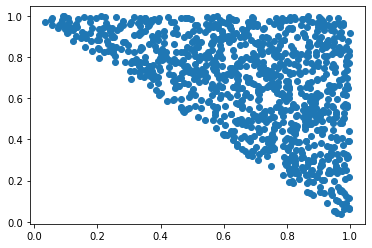

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_basic_triangle(n):
    points = np.random.rand(n,2)
    inside = points[:,0] + points[:,1] > 1
    new_points = np.where(np.tile(inside.reshape(n,1), (1,2)), points, 1-points)
    return new_points

points = sample_basic_triangle(1000)
plt.scatter(points[:,0], points[:,1])
plt.show()

Then we can map these uniform random points in the basic triangle to the target triangle, by an affine transformation.

$$
\boldsymbol{y}_i = A \boldsymbol{x}_i + \boldsymbol{b}
$$

where for $i=1,2,3$

- $\boldsymbol{y}_i = (y_{i1}, y_{i2})$ is vertex coordinate of the target triangle
- $\boldsymbol{x}_i = (x_{i1}, y_{i2})$ is vertex coordinate of the basic triangle
- $A=\left[\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right]$ is a matrix
- $\boldsymbol{b}=\left[\begin{array}{c}
b_{1}\\
b_{2}
\end{array}\right]$ is a vector

There are four unknown variables in $A$ and 2 in $\boldsymbol{b}$, and there are six equations, so we are able to solve them. Rearranging the equations gives the standard form of a linear system

$$
\left[\begin{array}{cccccc}
1 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 1 & 0 & 1\\
0 & 0 & 1 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 1
\end{array}\right]\left[\begin{array}{c}
a_{11}\\
a_{12}\\
a_{21}\\
a_{22}\\
b_{1}\\
b_{2}
\end{array}\right]=\left[\begin{array}{c}
y_{11}\\
y_{12}\\
y_{21}\\
y_{22}\\
y_{31}\\
y_{32}
\end{array}\right]
$$

Below is a python script to solve for $A$ and $\boldsymbol{b}$

In [2]:
from numpy.linalg import solve
def solve_affine(y):
    """
    y: shape (3,2), the vertex coordinates of the target triangle
    """

    C = np.array([[1,0,0,0,1,0],
                  [0,1,0,0,0,1],
                  [1,1,0,0,1,0],
                  [0,0,1,1,0,1],
                  [0,0,1,0,1,0],
                  [0,0,0,1,0,1]])
    Ab = solve(C, y.flatten())               
    A = Ab[:4].reshape(2, 2)
    b = Ab[-2:]
    return A, b

y = np.random.rand(3,2)
A, b = solve_affine(y)

Finally we can write the function for the random generator.

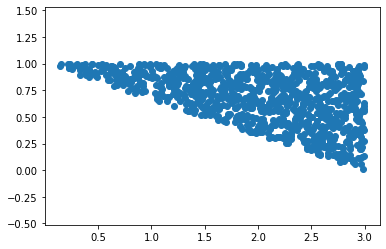

In [3]:
def sample_triangle(n, y):
    """
    sample from a triangle with vertex coordinates (0,1), (1,1), (1,0)
    """
    points = sample_basic_triangle(n)
    A, b = solve_affine(y)
    new_points = A @ points.T + b.reshape(2,1)
    return new_points.T

y = np.array([[3,0], [3,1], [0,1]])
n = 1000
points = sample_triangle(n, y)
plt.scatter(points[:,0], points[:,1])
plt.axis('equal')
plt.show()
